In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
Titles = pd.read_csv('Titles_English.csv')

In [3]:
Titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300350 entries, 0 to 300349
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            300350 non-null  int64 
 1   EAN                   300350 non-null  int64 
 2   Title                 300350 non-null  object
 3   Ingram Category Code  298869 non-null  object
 4   MJR BISAC             300350 non-null  object
 5   BISAC                 300350 non-null  object
 6   Annotation Text       300350 non-null  object
 7   Category              300350 non-null  int64 
 8   language_detected     300350 non-null  object
dtypes: int64(3), object(6)
memory usage: 20.6+ MB


In [4]:
Titles = Titles.drop('Unnamed: 0', axis=1)
Titles['EAN'] = Titles['EAN'].astype(str)

In [5]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1000, ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(Titles['Annotation Text']).toarray()
labels = Titles.Category
features.shape

(300350, 3829)

In [6]:
Titles_train, Titles_test = train_test_split(Titles, random_state=42)

In [7]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MaxAbsScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42)

# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()

# Fit on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Just transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model on the scaled data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Get the predicted labels and probabilities on the scaled test data
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy*100:.2f}%')

# Create a dataframe with the predicted labels and maximum probabilities (confidence scores)
results_df = pd.DataFrame({
    'Predicted Category': y_pred,
    'Confidence Score': np.max(y_pred_proba, axis=1)
}, index=Titles_test.index)  # use the same indices as in Titles_test

# Add the 'Annotation Text' column to the results
results_df = Titles_test[['EAN', 'Title', 'Annotation Text', 'MJR BISAC']].join(results_df)

# Print the results
print(results_df)

C:\Users\Pupnsuds90\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy: 71.48%
                  EAN                                              Title  \
13463   9781645212584  I Can Be Good at Journaling, too! Guided Journ...   
289609  9781773360577  Jace's Jewel                                  ...   
84208   9781942833673  Complete Submission                           ...   
100372  9781910266274  Stockport Trilogy                             ...   
152016  9781935785477  Waiting on God                                ...   
...               ...                                                ...   
35506   9781789632880  Level 3 Team Leader / Supervisor              ...   
28237   9781837619573  Alpha Female                                  ...   
40563   9781846649158  Francisco Franco                              ...   
154204  9781478770688  Making Great Decisions: A Roadmap             ...   
273801  9781770690219  Going Missional                               ...   

                                          Annotation Text MJR BI

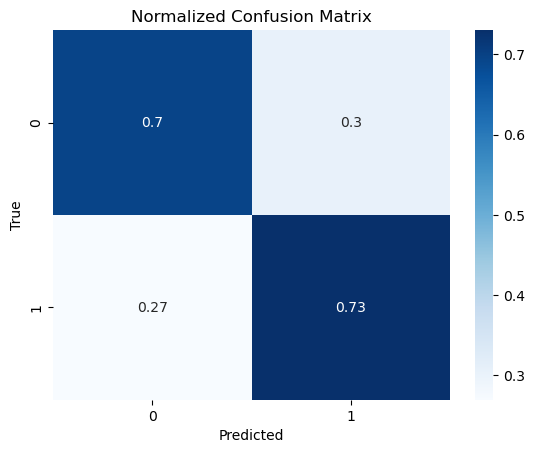

In [8]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_normalized, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

In [9]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=Titles['Category'].astype('str').unique()))

              precision    recall  f1-score   support

           1       0.68      0.70      0.69     33710
           0       0.75      0.73      0.74     41378

    accuracy                           0.71     75088
   macro avg       0.71      0.71      0.71     75088
weighted avg       0.72      0.71      0.72     75088



In [12]:
import plotly.graph_objects as go

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define the labels for the x-axis and y-axis
labels = sorted(set(y_test))

# Create the Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=cm_normalized,
    x=labels,
    y=labels,
    colorscale='Blues',
    colorbar=dict(title='Normalized Count'),
))

# Customize the layout
fig.update_layout(
    title='Normalized Confusion Matrix',
    xaxis=dict(title='Predicted', tickangle=-45),
    yaxis=dict(title='True', tickangle=0),
)

# Show the Plotly confusion matrix
fig.show()
# Export the plot as an HTML file
fig.write_html("model_2_confmat.html")

In [11]:
#results_df.to_csv('Model_2.csv')